## **i. Mount google drive**
---

In [105]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **ii. Import the libraries**
---

In [106]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Versions of key libraries")
print("---")
print("cv2:       ", cv2.__version__)
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)


Versions of key libraries
---
cv2:        4.1.2
numpy:      1.19.5
matplotlib: 3.2.2


## **iii. Append /iss/vse/data/ in your python path**
---

In [107]:
sys.path.append('/content/gdrive/My Drive/iss/vse/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/']

## **iv. Change working directory to /iss/vse/data/**
---

In [108]:
os.chdir('/content/gdrive/My Drive/iss/vse/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/vse/data'

## **v. Define `cv2plt` for image display**
---

In [109]:
def cv2plt(img):
    plt.figure(figsize=(7,7))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

## **Question a**
---
Read in the image 'symbols.jpg' and display the image. Name the image array as `sym`.

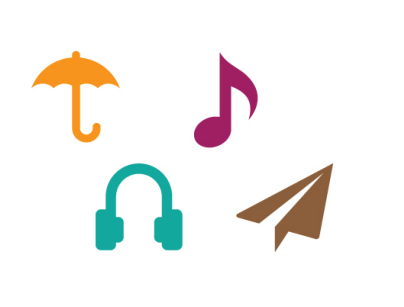

In [110]:
# Type your code below

sym = cv2.imread('symbols.jpg')
cv2plt(sym)

## **Question b**
---
Convert the image to grayscale and display the output. Name the output as `symg`.

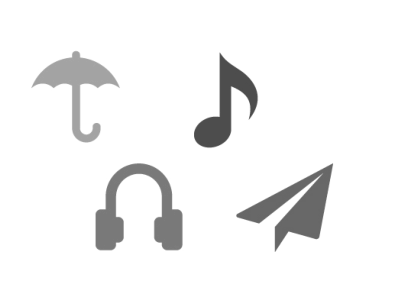

In [111]:
# Type your code below

symg = cv2.cvtColor(sym, cv2.COLOR_BGR2GRAY)
cv2plt(symg)

## **Question c**
---
Perform canny edge detction on `symg` and display the output. Name the output as `symc`

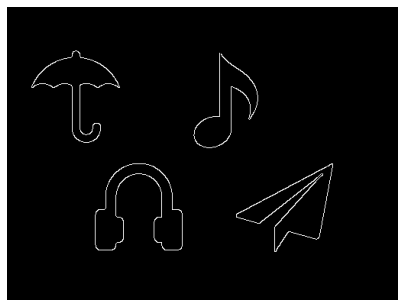

In [112]:
# Type your code below

symc= cv2.Canny(symg, 
                threshold1 =  31, # MinVal - every thing below minVal is not edge
                threshold2 = 127, # MaxVal - everything above maxVal is edge
                apertureSize=3) # Sobel kernel size - Filter image with Sobel kernel in both horizontal and vertical direction.

cv2plt(symc)

## **Question d**
___
Create the below. Name the final output as `symb`. The colour of the boundaries is (191,191,191). Run the code below to see the required output.

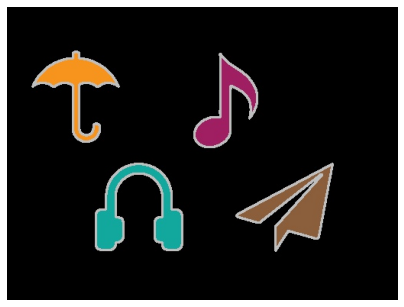

In [113]:
cv2plt(cv2.imread('wks2_3_d.jpg'))

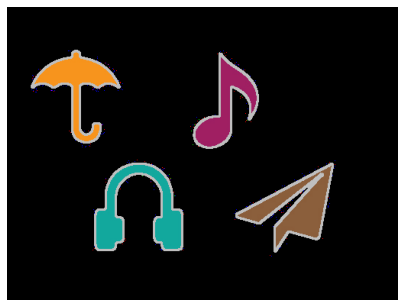

In [114]:
ctrs= cv2.findContours(np.uint8(symc), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
symb = sym.copy()
cv2.drawContours(symb, ctrs, -1, (191,191,191), 2)
symb[symb>252]=0
cv2plt(symb)

## **Question e**
---
Create the below output. Name the final output as `symhv`. Run the code below to see the required output.

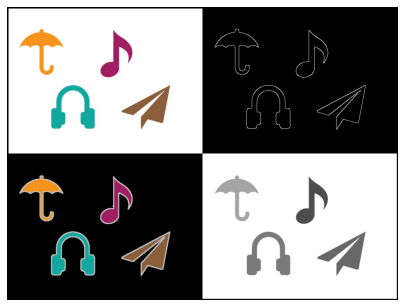

In [115]:
cv2plt(cv2.imread('wks2_3_e.jpg'))

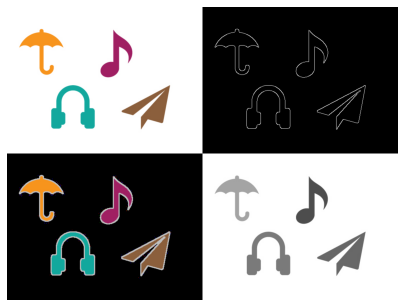

In [116]:
vis1 = np.concatenate((sym, symb), axis=0)

vis2 = np.concatenate((symc, symg), axis=0)
vis2 = cv2.cvtColor(vis2,cv2.COLOR_GRAY2BGR)

symhv = np.concatenate((vis1, vis2), axis=1)
cv2plt(symhv)